In [13]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


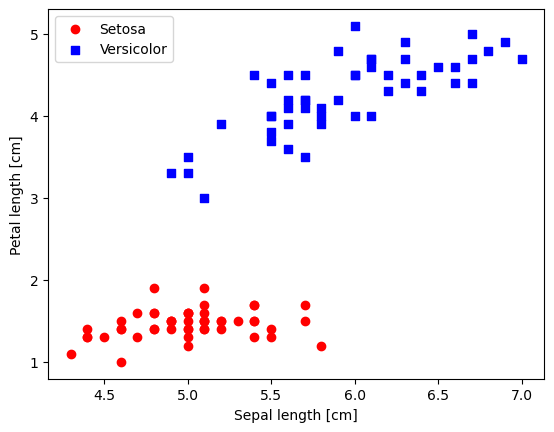

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')
df.tail()
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

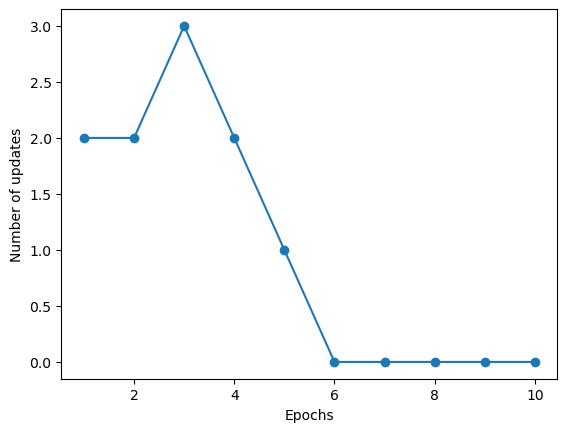

In [15]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

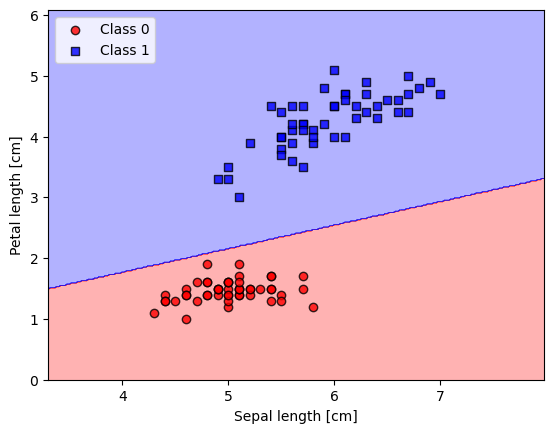

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


plt.show()

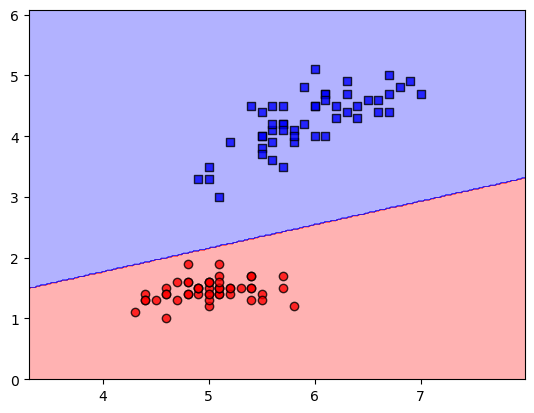

In [8]:
# setup marker generator and color map
resolution=0.02
markers = ('o', 's', '^', 'v', '<')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

# plot the decision surface
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
lab = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
lab = lab.reshape(xx1.shape)
plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# plot class examples
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], 
                y=X[y == cl, 1],
                alpha=0.8, 
                c=colors[idx],
                marker=markers[idx], 
                label=f'Class {cl}', 
                edgecolor='black')

# Training on titanic dataset


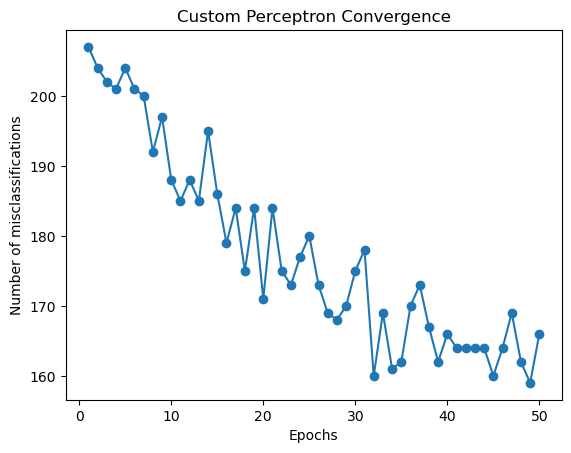

Accuracy: 0.7209302325581395


In [9]:
import seaborn as sns
# Set the proportion of data to use for training
test_split = 0.7

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Drop rows with missing age values
df = df.dropna(subset=['age'])

# Select relevant features and make a copy
X = df[['pclass', 'sex', 'age','fare', 'class', 'adult_male', 'alone']].copy()

# Convert categorical variables to numeric
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['class'] = X['class'].map({'First': 0, 'Second': 1, 'Third': 2})

# Convert all columns to integer type
for i in X.columns:
    X[i] = X[i].astype(int)

# Create binary target variable: 1 if alive, 0 if not
y = np.where(df.alive == 'yes', 1, 0)   

# Shuffle the dataset to avoid any ordering bias
np.random.seed(42)
indices = np.random.permutation(len(X))

# Determine the split index for training and testing
split_index = int(len(X) * test_split)
train_idx, test_idx = indices[:split_index], indices[split_index:]

# Split the dataset into training and testing sets
X_train, X_test = X.iloc[train_idx].values, X.iloc[test_idx].values
y_train, y_test = y[train_idx], y[test_idx]

# Initialize and train the custom Perceptron
ppn = Perceptron(eta = 0.1, n_iter = 50, random_state = 1)
ppn.fit(X_train, y_train)

# Plot the number of misclassifications per epoch
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Custom Perceptron Convergence')
plt.show()

# Predict on the test set using the trained model
y_pred = np.array([ppn.predict(xi) for xi in X_test])

# Calculate and print the accuracy on the test set
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


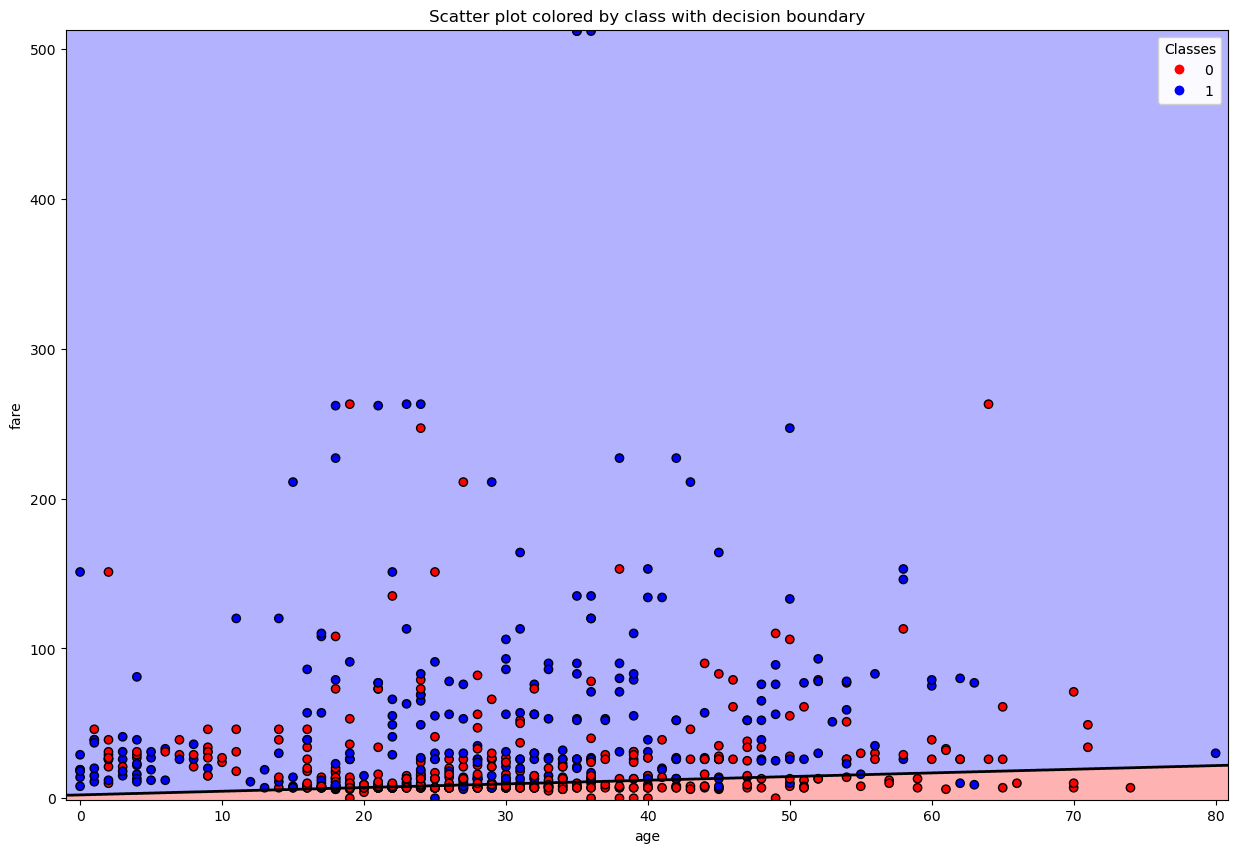

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Drop rows with missing age values
df = df.dropna(subset=['age'])

# Select relevant features and make a copy
X = df[['pclass', 'sex', 'age','fare', 'class', 'adult_male', 'alone']].copy()

# Convert categorical variables to numeric
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['class'] = X['class'].map({'First': 0, 'Second': 1, 'Third': 2})


plot1 = "age"
plot2 = "fare"

plot_X = X[[plot1,plot2]].copy()

colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
markers = ('o', 's', '^', 'v', '<')
cmap = ListedColormap(colors[:len(np.unique(y))])


# Convert all columns to integer type
for i in plot_X.columns:
    plot_X[i] = plot_X[i].astype(int)

# Create binary target variable: 1 if alive, 0 if not
y = np.where(df.alive == 'yes', 1, 0)   

# Shuffle the dataset to avoid any ordering bias
np.random.seed(42)
indices = np.random.permutation(len(plot_X))


X_train = plot_X.values
# Initialize and train the custom Perceptron
ppn = Perceptron(eta = 0.1, n_iter = 50, random_state = 1)
ppn.fit(X_train, y)


x_min, x_max = plot_X[plot1].min() - 1, plot_X[plot1].max() + 1
y_min, y_max = plot_X[plot2].min() - 1, plot_X[plot2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),  np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots(figsize=(15, 10))

# 1. Plot filled contour regions first (with transparency)
Z = ppn.predict(grid_points)
Z = Z.reshape(xx.shape)
contourf = ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

# 2. Plot the decision boundary line
contour = ax.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')

# 3. Plot scatter points on top of contours
scatter = ax.scatter(plot_X[plot1], plot_X[plot2], c=y, cmap=cmap, edgecolor='k')

# 4. Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# 5. Set labels and title
ax.set_xlabel(plot1)
ax.set_ylabel(plot2)
plt.title("Scatter plot colored by class with decision boundary")

plt.show()
